# 波士頓房價預測

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [19]:
import seaborn as sns

In [20]:
boston_dataset = load_boston()

In [21]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
boston = pd.DataFrame(boston_dataset.data,
                     columns=boston_dataset.feature_names)

In [23]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
boston['MEDV'] = boston_dataset.target

In [25]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 原始資料

In [26]:
X = boston.loc[:, "CRIM":"LSTAT"].values
Y = boston.MEDV

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

In [28]:
model1 = LinearRegression()

In [29]:
model1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_predict = model1.predict(x_test)

In [31]:
sns.set()

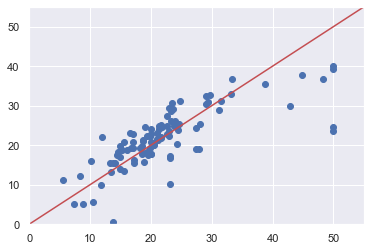

In [33]:
plt.scatter(y_test, y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'r')

# 刪除一些feature後

In [34]:
boston.drop('ZN', axis = 1, inplace = True)

In [35]:
boston.drop('PTRATIO', axis = 1, inplace = True)

In [36]:
boston.drop('B', axis = 1, inplace = True)

In [37]:
boston.drop('LSTAT', axis = 1, inplace = True)

In [38]:
boston.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,MEDV
0,0.00632,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,24.0
1,0.02731,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,21.6
2,0.02729,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,34.7
3,0.03237,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,33.4
4,0.06905,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,36.2


In [39]:
x = boston.loc[:, "CRIM":"TAX"].values
y = boston.MEDV.values

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.4,random_state=0)

In [43]:
model2 = LinearRegression()

In [44]:
model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_predict = model2.predict(x_test)

In [46]:
sns.set()

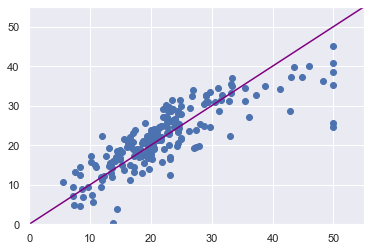

In [49]:
plt.scatter(y_test, y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'purple')